In [53]:
import numpy as np
import pandas as  pd
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

start = datetime.strptime('2004-01-02','%Y-%m-%d')
end = datetime.strptime('2009-06-30','%Y-%m-%d')
df = data.DataReader('^HSI',start=start,end=end)
#df=data.get_data_yahoo(tickers='^HSI',start=start,end=end)

df = df['Close']

[*********************100%***********************]  1 of 1 completed


In [58]:
rdata, len(rdata)

(array([[0.08871696],
        [0.09857878],
        [0.10007803],
        ...,
        [0.35351608],
        [0.36925006],
        [0.36577894]]),
 1354)

In [78]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rdata = scaler.fit_transform(np.array(df).reshape(-1,1))

#rdata=np.arange(1,1001,1).reshape(-1,1)
training_size = int(len(rdata)*0.65)
train_period, test_period = rdata[:training_size], rdata[training_size:]

from keras.preprocessing.sequence import TimeseriesGenerator
train = TimeseriesGenerator(train_period, pd.Series(train_period.reshape(1, -1)[0]).rolling(3).mean().fillna(0).reset_index(drop=True), length=100, batch_size=2000)
X_train, y_train = list(train)[0][0], list(train)[0][1]
#X_train, y_train
test = TimeseriesGenerator(test_period, pd.Series(test_period.reshape(1, -1)[0]).rolling(3).mean().fillna(0).reset_index(drop=True), length=100, batch_size=2000)
X_test, y_test = list(test)[0][0], list(test)[0][1]
#X_test, y_test

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=True)


2023-08-08 05:17:18.073542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-08 05:17:18.076354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-08 05:17:18.077709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-08-08 05:17:18.425165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-08 05:17:18.427040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-08 05:17:18.428794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - ETA: 0s - loss: 0.0213

2023-08-08 05:17:23.527069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-08 05:17:23.528800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-08 05:17:23.529935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - 6s 186ms/step - loss: 0.0213 - val_loss: 0.0254
Epoch 2/10
13/13 [==============================] - 2s 120ms/step - loss: 0.0040 - val_loss: 0.0053
Epoch 3/10
13/13 [==============================] - 2s 119ms/step - loss: 0.0010 - val_loss: 0.0068
Epoch 4/10
13/13 [==============================] - 1s 103ms/step - loss: 6.4622e-04 - val_loss: 0.0069
Epoch 5/10
13/13 [==============================] - 1s 116ms/step - loss: 5.0302e-04 - val_loss: 0.0046
Epoch 6/10
13/13 [==============================] - 1s 111ms/step - loss: 3.8818e-04 - val_loss: 0.0043
Epoch 7/10
13/13 [==============================] - 1s 106ms/step - loss: 3.3788e-04 - val_loss: 0.0042
Epoch 8/10
13/13 [==============================] - 1s 116ms/step - loss: 3.3614e-04 - val_loss: 0.0039
Epoch 9/10
13/13 [==============================] - 1s 104ms/step - loss: 3.3808e-04 - val_loss: 0.0037
Epoch 10/10
13/13 [==============================] - 1s 112ms/step - loss: 3.3683e-04 -

2023-08-08 05:17:39.707591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-08 05:17:39.710172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-08 05:17:39.711283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - 0s 25ms/step
test_predict 374


<function matplotlib.pyplot.show(close=None, block=None)>

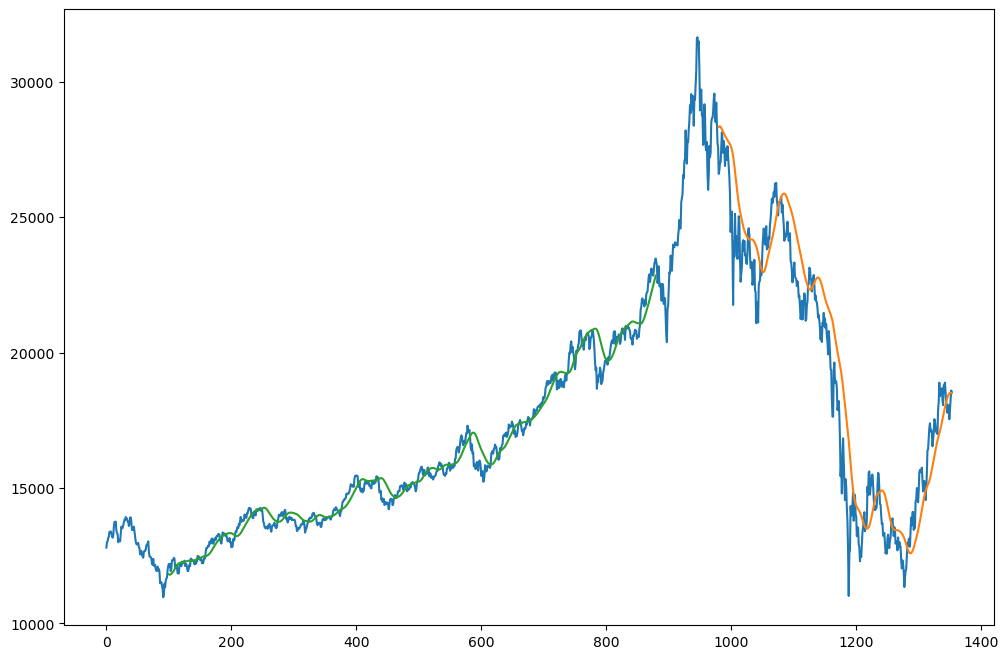

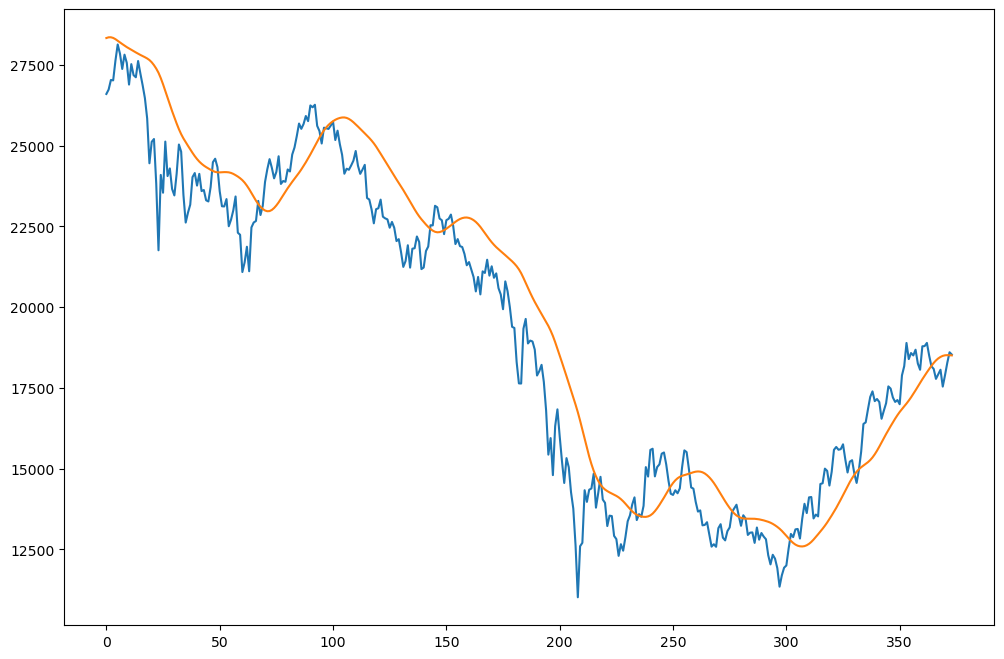

In [79]:
look_back=100
train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))
#create an array with same shape and type as data
trainPredictPlot=np.empty_like(rdata)
#initialize every entry of trainPredictPlot to NaN
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict
testPredictPlot=np.empty_like(rdata)
testPredictPlot[:,:] = np.nan
print('test_predict', len(test_predict))
testPredictPlot[len(train_predict)+(look_back*2):len(rdata)] = test_predict
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata)[len(train_predict)+(look_back*2):len(rdata)])
plt.plot(test_predict)
plt.show

In [77]:
len(rdata), len(X_train),len(X_test)

(1354, 780, 780)

In [56]:
pd.Series(train_period.reshape(1, -1)[0]).rolling(3).mean()

0           NaN
1           NaN
2      0.095791
3      0.101535
4      0.104732
         ...   
875    0.579733
876    0.580737
877    0.584520
878    0.592964
879    0.600328
Length: 880, dtype: float64

In [42]:
pd.Series(train_period.reshape(1, -1)[0]).rolling(3).mean().dropna().reset_index(drop=True)

0      0.565663
1      0.568374
2      0.571084
3      0.572289
4      0.572239
         ...   
891    0.672992
892    0.659237
893    0.647892
894    0.651205
895    0.651857
Length: 896, dtype: float64

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator
train = TimeseriesGenerator(df, df, length=1, batch_size=1000)


In [24]:
train_list = list(train)

In [25]:
train_list[0]

(array([[55.70000076],
        [55.70000076],
        [56.        ],
        [56.24000168],
        [56.24000168],
        [56.24000168],
        [56.22999954],
        [56.84999847],
        [57.11999893],
        [58.25      ],
        [57.79000092],
        [57.84999847],
        [57.79999924],
        [58.5       ],
        [58.79999924],
        [58.95999908],
        [58.5       ],
        [58.20000076],
        [58.        ],
        [57.65000153],
        [57.70000076],
        [57.40000153],
        [57.        ],
        [56.59999847],
        [56.34999847],
        [56.16999817],
        [57.27000046],
        [56.40000153],
        [56.90000153],
        [56.79999924],
        [56.79999924],
        [55.        ],
        [55.45000076],
        [55.29999924],
        [54.70000076],
        [54.09999847],
        [52.75      ],
        [52.18999863],
        [53.5       ],
        [54.20000076],
        [54.16999817],
        [54.11000061],
        [54.20000076],
        [54

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rdata = scaler.fit_transform(np.array(df).reshape(-1,1))
training_size = int(len(rdata)*0.65)
train_period, test_period = rdata[:training_size], rdata[training_size:]
train_period

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
train = TimeseriesGenerator(train_period, train_period, length=100, batch_size=1000)

In [93]:
import math
s=400
K=360
T=50/365
sigma=0.18
r=0.04
d1=math.log(s/K)+(r+0.5 * sigma**2)*T / (sigma * math.sqrt(T))
d2=d1-sigma*math.sqrt(T)
d1,d2
N_d1=0.58706
N_d2=0.55962
C= s * N_d1 - K * math.e ** (-r*T) * N_d2
C

34.46168905634528

In [98]:
import math
import scipy.stats as stats
s=62
K=60
T=40/365
sigma=0.32
r=0.04
d1=(math.log(s/K)+(r+0.5 * sigma**2)*T) / (sigma * math.sqrt(T))
d2=d1-sigma*math.sqrt(T)
N_d1=stats.norm.cdf(d1)
N_d2=stats.norm.cdf(d2)
N_d1=0.6554
N_d2=0.6179
C= s * N_d1 - K * math.e ** (-r*T) * N_d2
d1,d2,N_d1, N_d2,C

(0.40387905304771715, 0.29794549930661407, 0.6554, 0.6179, 3.7229604844759407)

In [88]:
2**3

8

In [100]:
import math
import scipy.stats as stats
s=340
K=300
T=55/365
sigma=0.18
r=0.04
d1=(math.log(s/K)+(r+0.5 * sigma**2)*T) / (sigma * math.sqrt(T))
d2=d1-sigma*math.sqrt(T)
N_d1=stats.norm.cdf(d1)
N_d2=stats.norm.cdf(d2)
N_d1=0.97193
N_d2=0.96712
C= s * N_d1 - K * math.e ** (-r*T) * N_d2
d1,d2,N_d1, N_d2,C

(1.9125018681836252, 1.8426291855328072, 0.97193, 0.96712, 42.06370525372313)